<a href="https://colab.research.google.com/github/krmonline/DGAPrediction/blob/master/DGA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
CHARS = [
  '\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+',
  ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8',
  '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E',
  'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R',
  'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_',
  'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
  'n', 'o', 'other', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
  'z', '}', '~', 'ก', 'ข', 'ฃ', 'ค', 'ฅ', 'ฆ', 'ง', 'จ', 'ฉ', 'ช',
  'ซ', 'ฌ', 'ญ', 'ฎ', 'ฏ', 'ฐ', 'ฑ', 'ฒ', 'ณ', 'ด', 'ต', 'ถ', 'ท',
  'ธ', 'น', 'บ', 'ป', 'ผ', 'ฝ', 'พ', 'ฟ', 'ภ', 'ม', 'ย', 'ร', 'ฤ',
  'ล', 'ว', 'ศ', 'ษ', 'ส', 'ห', 'ฬ', 'อ', 'ฮ', 'ฯ', 'ะ', 'ั', 'า',
  'ำ', 'ิ', 'ี', 'ึ', 'ื', 'ุ', 'ู', 'ฺ', 'เ', 'แ', 'โ', 'ใ', 'ไ',
  'ๅ', 'ๆ', '็', '่', '้', '๊', '๋', '์', 'ํ', '๐', '๑', '๒', '๓',
  '๔', '๕', '๖', '๗', '๘', '๙', '‘', '’', '\ufeff'
]
CHARS_MAP = {v: k for k, v in enumerate(CHARS)}

def name2arr(x):
  result = ""
  for i in x:
    if i not in CHARS_MAP:
      i = '\ufeff' #OutOfVocab
    if result == "":
      result = str(CHARS_MAP[i])
    else:
      result = result + "," + str(CHARS_MAP[i])
  return result

In [3]:
df_false = pd.read_csv("https://raw.githubusercontent.com/philarkwright/DGA-Detection/master/data/dga_training.txt",names = ['domain'])
df_true = pd.read_csv("https://raw.githubusercontent.com/handshake-org/hs-names/master/data/top-1m.csv",names = ['domain'])
df_false['label'] = 1
df_true['label'] = 0
#df_true.sample(100000)
df_true = df_true.iloc[:100000].copy()

In [4]:
df = pd.concat([df_false,df_true])

In [5]:
df['arr_num'] = df.domain.apply(name2arr)

In [6]:
df

,domain,label,arr_num
0,gllcsbqrbfch.com,1,"71,76,76,67,84,66,82,83,66,70,67,72,15,67,79,77"
1,hkgjjokkwodt.com,1,"72,75,71,74,74,79,75,75,88,79,68,85,15,67,79,77"
2,jjnehudfmclq.com,1,"74,74,78,69,72,86,68,70,77,67,76,82,15,67,79,77"
3,hieffvbcjitc.com,1,"72,73,69,70,70,87,66,67,74,73,85,67,15,67,79,77"
4,fckjmggtxchv.com,1,"70,67,75,74,77,71,71,85,89,67,72,87,15,67,79,77"
...,...,...,...
99996,mir-ved.ru,0,"77,73,83,14,87,69,68,15,83,86"
99997,coffeenews.it,0,"67,79,70,70,69,69,78,69,88,84,15,73,85"
99998,iglo.co.in,0,"73,71,76,79,15,67,79,15,73,78"
99999,taketours.com,0,"85,65,75,69,85,79,86,83,84,15,67,79,77"


In [7]:
arr_numID = []
maxlen = 0
n = 0
for i in df.arr_num:
  n = n+1
  #print(n,i)
  arr_tmp = [int(iInt) for iInt in i.split(',')]
  #print(arr_tmp)
  arr_numID.append(arr_tmp)
  #print(i.split(','))
  lentmp = len(arr_numID[-1])
  if maxlen < lentmp:
    maxlen = lentmp
    #print(arr_tmp)
maxlen = int(maxlen*1.5)
print(maxlen)

100


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = tf.keras.preprocessing.sequence.pad_sequences(
    arr_numID, maxlen=maxlen, dtype='int32', padding='pre',
    truncating='pre', value=0.0
)
y = df.label.values

In [10]:
X_trainTMP, X_test, y_trainTMP, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainTMP, y_trainTMP, test_size=0.3, random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape,

((112000, 100), (112000,), (48000, 100), (48000,), (40000, 100), (40000,))

In [11]:
vocab_size = len(CHARS)
print(vocab_size)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 1, input_length=maxlen),
    tf.keras.layers.LSTM(1,return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()
loss = []
val_loss = []
acc = []
val_acc = []

178
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 1)            178       
_________________________________________________________________
lstm (LSTM)                  (None, 1)                 12        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 192
Trainable params: 192
Non-trainable params: 0
_________________________________________________________________


In [12]:
%%time
history_tmp = model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),verbose=1)

Epoch 1/10
3500/3500 [==============================] - 46s 8ms/step - loss: 0.4170 - accuracy: 0.9028 - val_loss: 0.1294 - val_accuracy: 0.9678
Epoch 2/10
3500/3500 [==============================] - 28s 8ms/step - loss: 0.1262 - accuracy: 0.9653 - val_loss: 0.0955 - val_accuracy: 0.9728
Epoch 3/10
3500/3500 [==============================] - 28s 8ms/step - loss: 0.0931 - accuracy: 0.9725 - val_loss: 0.0786 - val_accuracy: 0.9777
Epoch 4/10
3500/3500 [==============================] - 28s 8ms/step - loss: 0.0863 - accuracy: 0.9741 - val_loss: 0.0662 - val_accuracy: 0.9790
Epoch 5/10
3500/3500 [==============================] - 28s 8ms/step - loss: 0.0669 - accuracy: 0.9780 - val_loss: 0.0612 - val_accuracy: 0.9801
Epoch 6/10
3500/3500 [==============================] - 28s 8ms/step - loss: 0.0596 - accuracy: 0.9798 - val_loss: 0.0556 - val_accuracy: 0.9808
Epoch 7/10
3500/3500 [==============================] - 28s 8ms/step - loss: 0.0573 - accuracy: 0.9797 - val_loss: 0.0535 - val_ac

In [13]:
loss.extend(history_tmp.history['loss'])
val_loss.extend(history_tmp.history['val_loss'])
acc.extend(history_tmp.history['accuracy'])
val_acc.extend(history_tmp.history['val_accuracy'])

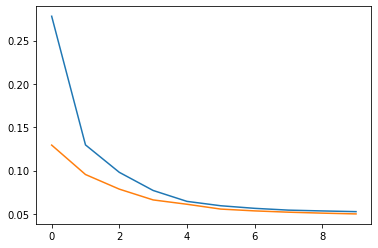

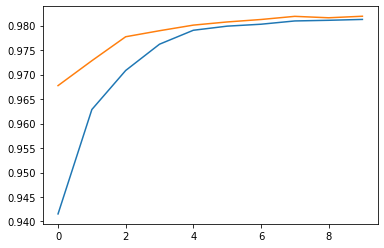

In [14]:
plt.plot(loss)
plt.plot(val_loss)
plt.show()
plt.plot(acc)
plt.plot(val_acc)

In [42]:
name = "nonehgdemxxw.com"
arr = [int(i) for i in name2arr(name).split(",")]
dataTest = tf.keras.preprocessing.sequence.pad_sequences(np.array([arr]), maxlen=maxlen, dtype='int32', padding='pre',truncating='pre', value=0.0)
print ("This Domain is DGA" if model.predict(dataTest)[0][0] > 0.5 else "This Domain is not DGA")

This Domain is DGA


In [43]:
from sklearn import metrics

In [44]:
pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     20123
           1       0.98      0.98      0.98     19877

    accuracy                           0.98     40000
   macro avg       0.98      0.98      0.98     40000
weighted avg       0.98      0.98      0.98     40000



In [46]:
pred = model.predict(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred)

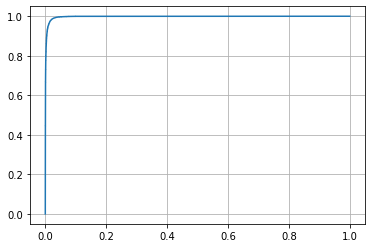

In [47]:
plt.grid()
plt.plot(fpr,tpr)

In [23]:
model.save_weights("weights/dga")